In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

In [ ]:
# Mount drive if needed in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
data = data.drop(['Time'], axis=1)

In [ ]:
# Separate features and target variable
x = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
# Split the data
xtr, xt, ytr, yt = train_test_split(x, y, test_size=0.33, random_state=10)

In [ ]:
set=pd.concat([xtr,ytr],axis=1)

In [ ]:
# Separate data points for each class
class_0 = set[set['Class'] == 0]
class_1 = set[set['Class'] == 1]

In [ ]:
# Sample 500 data points from each class
class_0 = class_0.sample(n=100000, random_state=42)
# class_1_sampled = class_1.sample(n=492, random_state=42)

In [ ]:
set=pd.concat([class_0,class_1],axis=0)
xtr=set.drop('Class',axis=1)
ytr=set['Class']

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
sample=SMOTE()

xtr,ytr=sample.fit_resample(xtr,ytr)

In [ ]:
# # Combine the sampled data points
# reduced_data = pd.concat([class_0_sampled, class_1_sampled])
# X = reduced_data.drop('Class', axis=1)
# y = reduced_data['Class']

In [ ]:
xtr.shape,xt.shape, ytr.shape, yt.shape

((200000, 29), (93987, 29), (200000,), (93987,))

In [ ]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion = 'gini',max_depth=10)
dt_model = model.fit(xtr, ytr)


In [ ]:
# Make predictions
y_pred_dt = dt_model.predict(xt)


In [ ]:
# Print evaluation metrics
print("Accuracy Decision Tree:", metrics.accuracy_score(yt, y_pred_dt))
print("Precision Decision Tree:", metrics.precision_score(yt, y_pred_dt))
print("Recall Decision Tree:", metrics.recall_score(yt, y_pred_dt))
print("F1 Score Decision Tree:", metrics.f1_score(yt, y_pred_dt))
print(confusion_matrix(yt, y_pred_dt))


Accuracy Decision Tree: 0.9871684381882601
Precision Decision Tree: 0.10326499620349279
Recall Decision Tree: 0.84472049689441
F1 Score Decision Tree: 0.18403247631935046
[[92645  1181]
 [   25   136]]


In [ ]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(model,filled=True)

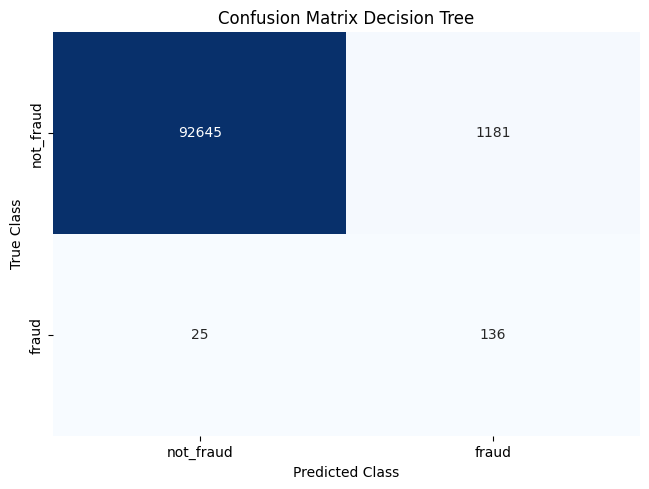

In [ ]:
# Confusion Matrix
matrix_dt = confusion_matrix(yt, y_pred_dt)
cm_dt = pd.DataFrame(matrix_dt, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])
sns.heatmap(cm_dt, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix Decision Tree"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# ROC and AUC
y_pred_dt_proba = dt_model.predict_proba(xt)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(yt, y_pred_dt_proba)
auc_dt = roc_auc_score(yt, y_pred_dt_proba)
print("AUC Decision Tree:", auc_dt)

AUC Decision Tree: 0.922490892021216


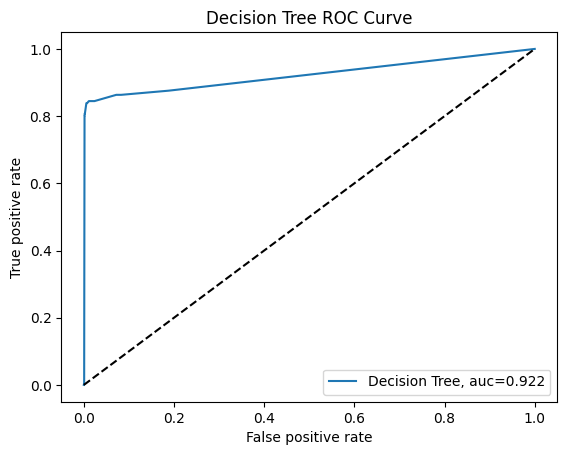

In [ ]:
# Plot ROC Curve
plt.plot(fpr_dt, tpr_dt, label="Decision Tree, auc={:.3f}".format(auc_dt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc=4)
plt.show()


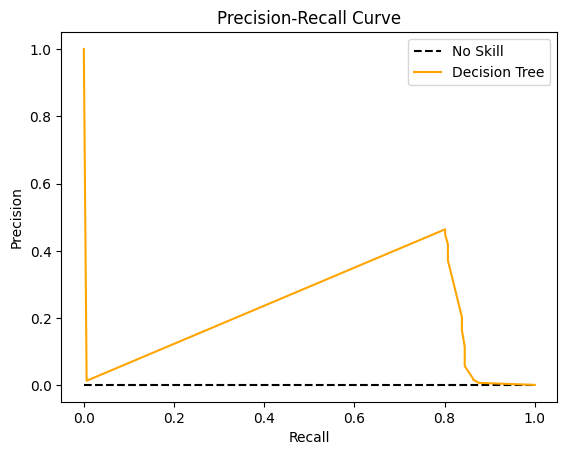

AUC Decision Tree: 0.922490892021216


In [ ]:
# Precision-Recall Curve
dt_precision, dt_recall, _ = precision_recall_curve(yt, y_pred_dt_proba)
no_skill = len(yt[yt == 1]) / len(yt)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(dt_recall, dt_precision, color='orange', label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
y_pred_dt_proba = dt_model.predict_proba(xt)[:, 1]
fpr_dt, tpr_dt, _ = precision_recall_curve(yt, y_pred_dt_proba)
auc_dt = roc_auc_score(yt, y_pred_dt_proba)
print("AUC Decision Tree:", auc_dt)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5, 6],
  'max_features':['sqrt', 'log2', 'auto']

}

In [ ]:
clf=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5,scoring='accuracy')

In [ ]:
clf.fit(xtr,ytr)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
ypred=clf.predict(xt)


In [ ]:
print("Accuracy Decision Tree:", metrics.accuracy_score(yt, ypred))
print("Precision Decision Tree:", metrics.precision_score(yt, ypred))
print("Recall Decision Tree:", metrics.recall_score(yt, ypred))
print("F1 Score Decision Tree:", metrics.f1_score(yt, ypred))


Accuracy Decision Tree: 0.9594624788534585
Precision Decision Tree: 0.03515923566878981
Recall Decision Tree: 0.8571428571428571
F1 Score Decision Tree: 0.06754772393538913


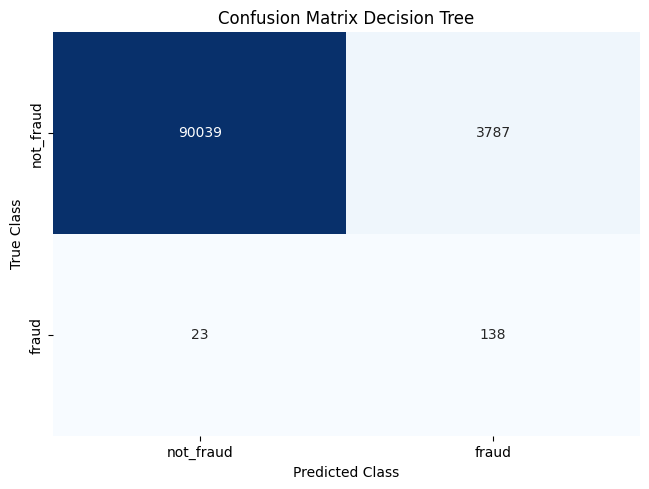

In [ ]:
matrix_dt = confusion_matrix(yt, ypred)
cm_dt = pd.DataFrame(matrix_dt, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])
sns.heatmap(cm_dt, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix Decision Tree"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()